# LinearSVC

참고 : 파이썬 라이브러리를 활용한 머신러닝

> 다중 분류도 가능하다. <br>

##### 다중 분류
> 일대다 방식으로 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다. <br>
> 클래스의 수만큼 이진 분류 모델이 만들어진다.

### parameter
* C : 규제의 강도
> 기본값 1.0 <br>
> 값이 작아질 수록 모델이 단순

##### 라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

##### 데이터 불러오기

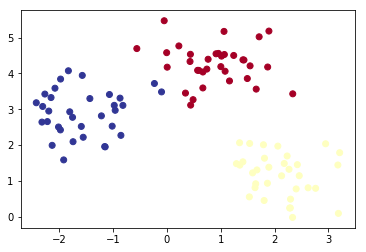

In [3]:
X, y = make_blobs(100, 2, centers=3, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdYlBu')

##### 데이터 나누기

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

##### 모델 훈련

In [5]:
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

##### 모델 평가

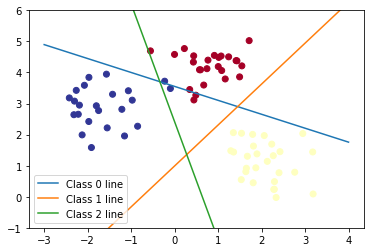

In [6]:
x = np.linspace(-3,4)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(x, -(coef[0] * x + intercept)/coef[1])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu')
plt.ylim((-1,6))
plt.legend(['Class 0 line','Class 1 line','Class 2 line'])

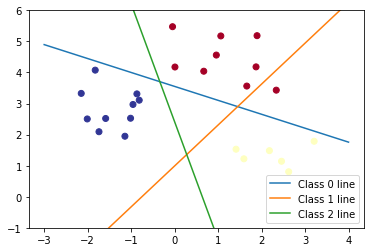

In [7]:
x = np.linspace(-3,4)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(x, -(coef[0] * x + intercept)/coef[1])
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu')
plt.ylim((-1,6))
plt.legend(['Class 0 line','Class 1 line','Class 2 line'])

In [8]:
print('train score : {}'.format(linear_svm.score(X_train, y_train)))
print('test score : {}'.format(linear_svm.score(X_test, y_test)))

train score : 0.9733333333333334
test score : 1.0


##### 목표 변수 예측

In [9]:
pred = linear_svm.predict(X_test)
pred

array([1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2,
       0, 0, 0])

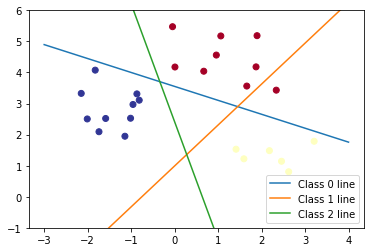

In [10]:
x = np.linspace(-3,4)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(x, -(coef[0] * x + intercept)/coef[1])
plt.scatter(X_test[:,0], X_test[:,1], c=pred, cmap='RdYlBu')
plt.ylim((-1,6))
plt.legend(['Class 0 line','Class 1 line','Class 2 line'])

### 선형 모델의 특징
> 학습 속도가 빠르고 예측도 빠르다. <br>
> 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동한다. <br>
> 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다. <br>
> 샘플에 비해 특성이 많을 때 잘 작동한다.